<a href="https://colab.research.google.com/github/Gonzales-James/CpE-AIML/blob/main/Logistic_Regression/58034_Lab05_Henerawr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About the Dataset**

***Purpose of the Dataset*** 

The purpose of this dataset is to locate the lumps of the patient caused by the breast cancer. It also aims to observe which features will be most helpful in predicting malignant or benign cancer and to see general trends that may aid in model selection and hyper parameter selection. This dataset is used to classify whether breast cancer is benign or malignant.

\\

***Need statement*** 

One of the leading cancer diseases that is developed in many countries is breast cancer. The death toll dues to breast cancer have increased drastically in last few decades. The main issue that is relevant to its cure is early recognition of the disease. Early recognition of this disease can increase the survival rate of the women who are being diagnosed with breast cancer. One solution is integrating Data Analytics in to the medical field in order to resolve this issue.   

\\

***Significance*** 

The significance of this dataset is to recognize the disease early. Early diagnosis or recognition of breast cancer can increase the chance of survival and the patient can have their timely clinical treatment. With early recognition and classification of the disease can avoid unnecessary treatments of the patient. Classification and data mining methods are a productive process to classify and predict data especially in the medical field.

## **Dataset from sklearn**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
X = X[:569:,1]
X = X.reshape((-1,1))
y = y.reshape((-1,1))

In [5]:
### Label the datasets programmatically
X1 = np.append(X,np.ones((X.shape[0],1)), axis = 1)
X2 = np.append(y,np.zeros((y.shape[0],1)), axis = 1)

### Combine to a single dataset
X_train = np.vstack((X1,X2))

In [6]:
## Set the data for the dataset
X = X_train[:,0:49]
X = np.hstack((X,np.ones((X_train.shape[0], 1))))
y = X_train[:,1].reshape(-1,1)

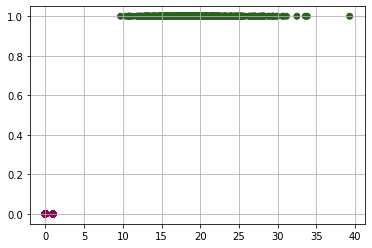

In [7]:
#plt.figure(figsize=(15, 10))
plt.scatter(X[:,0], X[:,1], c=y, cmap='PiYG')
# plt.ylabel("Gloabl Sales")
# plt.xlabel("North America Sales")
plt.grid()
plt.show()

In [8]:
### Creating a Binary Linear Classifier using Least Squares

## Compute for the weights
pseudo_inv = np.linalg.inv(X.T @ X)
weights = pseudo_inv @ (X.T @ y)
weights

array([[ 1.75171835e-15],
       [ 1.00000000e+00],
       [-1.31188463e-15]])

In [9]:
# ## Visualize
# def class_plot(X, y, weights):
#   plt.figure(figsize=(8,8))

#   xmin, xmax = X[:,1].min()-1, X[:,1].max()+1
#   xaxis = np.linspace(xmin,xmax)
#   yaxis = -weights[0]/weights[-1] - (weights[1]/weights[-1])*xaxis


#   plt.scatter(X[:,0], X[:,1], c=y, cmap='PiYG')
#   plt.plot(xaxis, yaxis, label='decision boundary') 

#   plt.legend()
#   plt.grid()
#   plt.xlabel('Feature')
#   plt.ylabel('Target')
#   plt.show()  

# class_plot(X,y,weights)

## **Logistic Regression**

In [10]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:569:,1]
X = X.reshape((-1,1))
y = y.reshape((-1,1))

In [11]:
## Weights 

pseudo_inv = np.linalg.inv(X.T @ X)
weights = pseudo_inv @ (X.T @ y)

In [12]:
log_model = LogisticRegression(random_state=0)
log_model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

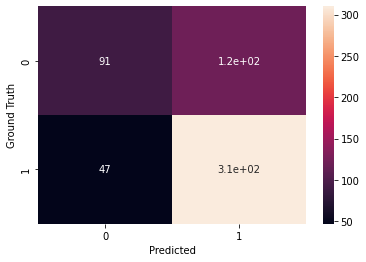

In [13]:
preds = log_model.predict(X)
conf_mat = metrics.confusion_matrix(y, preds)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show()

In [14]:
## Create an inference instance to make predictions
infer = lambda X : np.round(X@weights)
X_test = np.array([2]) 
infer(X_test)

array([0.])

In [15]:
### L2 Error
preds = infer(X)
residuals = y - preds
l2_error = np.sqrt(np.sum(np.square(residuals)))
l2_error

19.131126469708992

In [16]:
### Accuracy
accuracy = 1-np.mean(np.abs(residuals))
accuracy

0.35676625659050965

In [17]:
class_metrics = {
    'accuracy': [metrics.accuracy_score(y, preds)],
    'precision': [metrics.precision_score(y, preds, average=None)],
    'recall': [metrics.recall_score(y, preds, average=None)],
    'f1-score': [metrics.f1_score(y, preds, average=None)]
}
pd.DataFrame(class_metrics)

,accuracy,precision,recall,f1-score
0,0.356766,"[0.1188118811881188, 0.4877384196185286]","[0.11320754716981132, 0.5014005602240896]","[0.11594202898550725, 0.4944751381215469]"


#**Functions**

In [18]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [19]:
X, y = load_breast_cancer(return_X_y=True)

In [20]:
X = X[:569:,1]
X = X.reshape((-1,1))
y = y.reshape((-1,1))

In [21]:
class Classification:
  def __init__ (self, X, y):
    self.X = X
    self.y = y

  def train(self):
    pseudo_inv = np.linalg.inv(self.X.T @ self.X)
    self.weights = pseudo_inv @ (self.X.T @ self.y)
    return self.weights

  def predict(self):
    self.log_model = LogisticRegression(random_state=0)
    self.log_model.fit(self.X, self.y)
    self.preds = log_model.predict(X)
    return self.preds

  def evaluate(self): 
    class_metrics = {
        'accuracy': [metrics.accuracy_score(y, preds)],
        'precision': [metrics.precision_score(y, preds, average=None)],
        'recall': [metrics.recall_score(y, preds, average=None)],
        'f1-score': [metrics.f1_score(y, preds, average=None)]
    }
    return pd.DataFrame(class_metrics)
  
  def visualize(self):
    plt.scatter(X,y, color='red')
    plt.scatter(X,preds, color='green')
    plt.grid()
    return plt.show()

In [22]:
CL = Classification(X, y)

In [23]:
CL.train()

array([[0.02877946]])

In [24]:
CL.predict()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

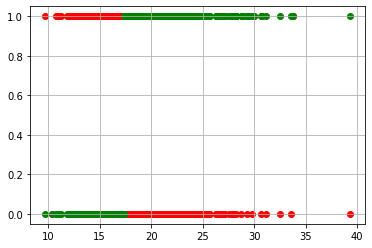

In [25]:
CL.visualize()

In [26]:
CL.evaluate()

,accuracy,precision,recall,f1-score
0,0.356766,"[0.1188118811881188, 0.4877384196185286]","[0.11320754716981132, 0.5014005602240896]","[0.11594202898550725, 0.4944751381215469]"
